In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from tabula import read_pdf

In [5]:
df1 = read_pdf("UCLA_Math_Gender/Majors-by-gender 2002-2003.pdf")

In [6]:
df_list = []

import glob
for name in sorted(glob.glob("UCLA_Math_Gender/*")):
    print(name)
    df024 = read_pdf(name, multiple_tables=True, pages ='all')
    df_list.append(df024)

df_list.pop()

print('Done')

UCLA_Math_Gender/Majors-by-gender 2002-2003.pdf
UCLA_Math_Gender/Majors-by-gender 2003-2004.pdf
UCLA_Math_Gender/Majors-by-gender 2004-2005.pdf
UCLA_Math_Gender/Majors-by-gender 2005-2006.pdf
UCLA_Math_Gender/Majors-by-gender 2006-2007.pdf
UCLA_Math_Gender/Majors-by-gender 2007-2008.pdf
UCLA_Math_Gender/Majors-by-gender 2008-2009.pdf
UCLA_Math_Gender/Majors-by-gender 2009-2010.pdf
UCLA_Math_Gender/Majors-by-gender 2010-2011.pdf
UCLA_Math_Gender/Majors-by-gender 2011-2012.pdf
UCLA_Math_Gender/Majors-by-gender 2012-2013.pdf
Done


In [7]:
print(len(df_list))

num = int(df_list[1][2].loc[2][5])
print(num)

10
16


In [8]:
df2 = read_pdf("UCLA_Math_Gender/Majors-by-gender 2002-2003.pdf", multiple_tables=True, pages ='all')

### By Year, Seniors in Spring Quarter, by Math Discipline, Male and Female 

General Math and Math for Teaching overlap

General Math ends in Spring 2009
Row 8

Math for Teaching begins in Fall 2006
Row 14 from Fall 2006 to Spring 2008
Row 8 from Fall 2009 onwards

In [9]:
#List to store male/female students by specialization

special_range = {2:['Applied'],4:['Pure'],6:['Computation'],10:['Science'],12:['Economics']}

#Education and Generalization specializations do not begin/end same years
#Each in set only 6 years of data, the amount of data is 10 years


for key in special_range:
    special_female = []
    special_male = []

    for year in df_list:
        dudes = int([year][0][4].loc[key][7])
        special_male.append(dudes)
    
    for year in df_list:
        gals = int([year][0][4].loc[key][8])
        special_female.append(gals)
    
    special_range[key].append(special_male)
    special_range[key].append(special_female)



In [10]:
x_year = []
i = 0
last = 2002

while i < 10:
    first = last
    last += 1
    name = str(first)+ '-' +str(last)
    x_year.append(name)
    i = i+1
    
for item in x_year:
    print(item)

2002-2003
2003-2004
2004-2005
2005-2006
2006-2007
2007-2008
2008-2009
2009-2010
2010-2011
2011-2012


### General Math and Math for Education majors have to be added separately.
General Math was ended as a specialization in the year 2008.
Math for Education was added as a specialization in the year 2006.

In [11]:
male_gen = [] 
female_gen = [] 

#index for "math generals" major is 8

for year in df_list:
    dudes = int([year][0][4].loc[8][7])
    male_gen.append(dudes)
    
for year in df_list:
    gals = int([year][0][4].loc[8][8])
    female_gen.append(gals)
    
#ROW 8 last three years: general math index = math for education index
    

In [12]:
#list range, items are only beginning years where Math for Ed 
#was in Row 14
#None = null values for first four years
male_edu = [0,0,0,0]
female_edu = [0,0,0,0]

for year in df_list[4:7]:
    dudes = int([year][0][4].loc[14][7])
    male_edu.append(dudes)
    
for year in df_list[4:7]:
    gals = int([year][0][4].loc[14][8])
    female_edu.append(gals)

In [13]:
few = [0,1,2]
for i in few:
    popcorn = male_gen.pop()
    male_edu.append(popcorn)
    
for i in few:
    popcorn = female_gen.pop()
    female_edu.append(popcorn)
    
for i in few:
    male_gen.append(0)
    female_gen.append(0)
    
male_gen

[6, 7, 6, 12, 5, 1, 0, 0, 0, 0]

In [14]:
special_range[8]= ['General', male_gen , female_gen]
special_range[14]= ['Education', male_edu , female_edu]

## UCLA Math Department
### Math Majors by Specialization, Gender

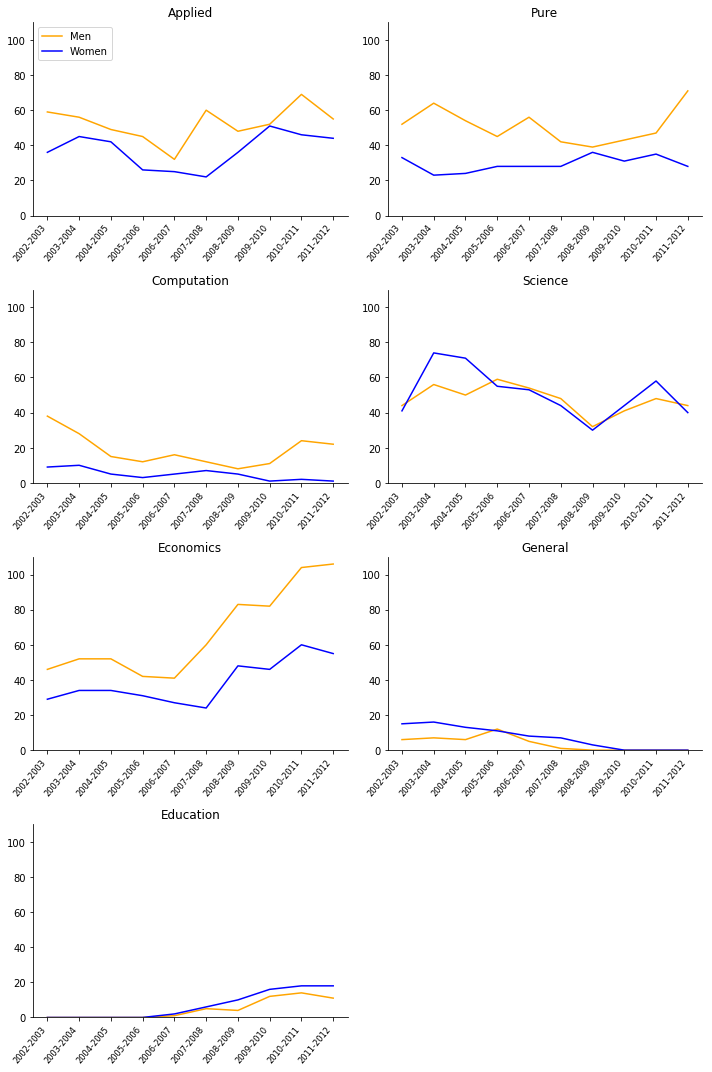

In [81]:

men = []
women = []
fig = plt.figure(figsize=(10, 15))


i = 1

for key in special_range:    
    title_spec = special_range[key][0]
    men= special_range[key][1]
    women= special_range[key][2]
    
    ax = fig.add_subplot(4,2,i)
    ax.plot(x_year, men, color='orange', label='Men')
    ax.plot(x_year, women, color='blue', label='Women')
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    if i ==1:
        plt.legend(loc='upper left')
    i+=1
    plt.ylim([0,110])
    plt.title(title_spec)
    plt.xticks(rotation=50, horizontalalignment='right', fontweight='light', fontsize='small')



fig.tight_layout()
plt.show()

### Math Majors by Gender, Specialization

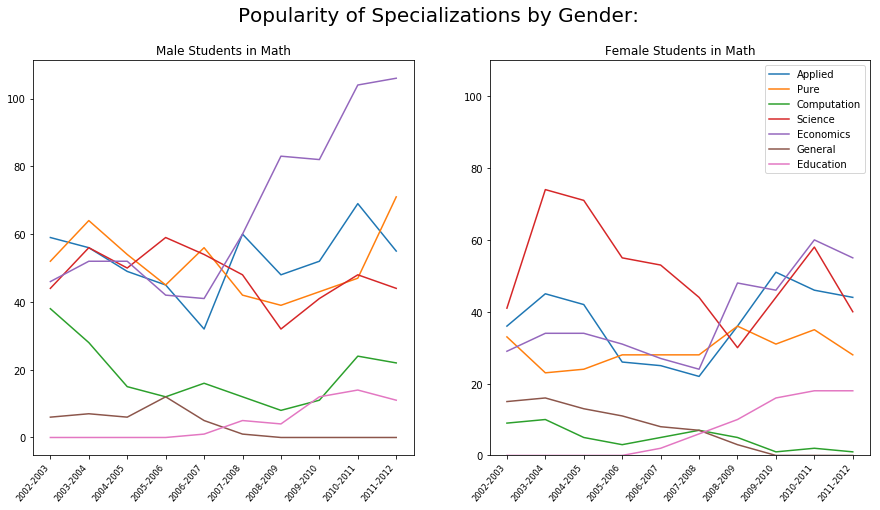

In [57]:
men1 = []
women1 = []
fig1 = plt.figure(figsize=(15, 15))
ax_MEN = fig1.add_subplot(2,2,1)
ax_WOMEN = fig1.add_subplot(2,2,2)


for key in special_range:    
    title_spec = special_range[key][0]
    men1= special_range[key][1]
    women1= special_range[key][2]
    
    ax_MEN.plot(x_year, men1, label=title_spec)
    ax_WOMEN.plot(x_year, women1, label=title_spec)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ax_MEN.set_xticklabels(x_year, rotation=50, ha='right', fontweight='light', fontsize='small')
    ax_WOMEN.set_xticklabels(x_year, rotation=50, ha='right', fontweight='light', fontsize='small')
    
    plt.ylim([0,110])

    
plt.suptitle("Popularity of Specializations by Gender:", size=20)
plt.subplots_adjust(top=.93)

ax_MEN.title.set_text('Male Students in Math')
ax_WOMEN.title.set_text('Female Students in Math')
plt.legend(loc='upper right')


fig.tight_layout()
plt.show()

### Conclusion

From the first set of graphs, there are generally less female students than male students in almost all of the math specializations, especially for specializations that may lead to financially lucrative careers (Economics and Computation).

Math for Education are the majors where there are consistently less male students are enrolled than female students, and also have the lowest numbers of students enrolled out of all specializations.
Math for Education may have supplanted the General Math specialization, as both have equally low numbers of students enrolled.

The Computation specialization is also low, but there are more male students than female students in all the years.

The Economics specialization is consistently growing as the most popular specialization in the Math Department.

Math for Science is the only specialization for male to female ratio of students seem balanced over the years.


### Popularity of Specializations among Gender

From the second set of graphs:
    
Among male students at UCLA, Economics and Pure specializations appear to be growing in popularity.

Among female students at UCLA, the Science specialization was the most popular but declined over time, matching then being overtaken by the popularity of the Economics and Applied specializations. 

### Actionable Insight

Among both male and female math majors, Computations and Education are the least popular specializations. 

UCLA can investigate the reason for the lack of interest in Computation and Education, and either put more efforts into recruiting students for these specializations, or absorb them into the more popular specializations. From the course requirements for the specializations, it appears that all specializations have the same core requirements. 

Perhaps the Education and Computation specializations can become degree minors, and retain specific classes. 

It would be interesting if I could obtain more recent data to observe if Computation specialization has grown with opportunities in the tech industry.